<a href="https://colab.research.google.com/github/Alonge9500/Alonge9500/blob/main/loan_prediction_datahack_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction
## Datahack Analytics on analytics vidhya
### Project description
* Since the datahack does not require any form of Exploratory analysis the project will be focus on
** Data cleaning
** Normalization and Standardization
** Encoding
** Best features
** Model Building
** Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv')
test = pd.read_csv('https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv')

train_copy = train.copy()
test_copy = test.copy()

In [3]:
train_copy.Loan_Amount_Term.mode()[0]

360.0

In [4]:
train_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### On the Train data
* Gender column has 13 missing value | Could be fix with Mode value
* Married column has 3 missing value | Could also be fix with mode value
* Dependent has about 15 missing values | Since there are chances that people without dependent might not have any we could fix this with 0
* Self Employed has 32 missing values | We can fix this with fill na forward option
* LoanAmount has 22 missing values | We can fix this with mean value
* Loan Amount Term has 14 missing values | We can fix this with mode value of the column
* credit history has 50 missing value | We can't possible drop the credit history due to its large correlation to our dependent variable
* Convert 3+ values in Dependent column to 3

In [5]:
train_copy.LoanAmount.mean()

146.41216216216216

In [6]:
# Fixing missing values
# Gender
train_copy.Gender = train_copy.Gender.fillna(train_copy.Gender.mode()[0])
train_copy.Gender = test_copy.Gender.fillna(test_copy.Gender.mode()[0])

# Married
train_copy.Married = train_copy.Married.fillna(train_copy.Married.mode()[0])
test_copy.Married= test_copy.Married.fillna(test_copy.Married.mode()[0])

# Dependents
train_copy.Dependents = train_copy.Dependents.fillna('0')
test_copy.Dependents = test_copy.Dependents.fillna('0')
train_copy.Dependents = train_copy.Dependents.replace('3+','3')
test_copy.Dependents = test_copy.Dependents.replace('3+','3')
pd.to_numeric(train_copy['Dependents'])
# Self_Employed
train_copy.Self_Employed = train_copy.Self_Employed.fillna(method='ffill')
test_copy.Self_Employed = test_copy.Self_Employed.fillna(method='ffill')

# Loan Amount
train_copy.LoanAmount = train_copy.LoanAmount.fillna(train_copy.LoanAmount.mean())
test_copy.LoanAmount = test_copy.LoanAmount.fillna(test_copy.LoanAmount.mean())

# Loan Amount Term
train_copy.Loan_Amount_Term = train_copy.Loan_Amount_Term.fillna(train_copy.Loan_Amount_Term.mean())
test_copy.Loan_Amount_Term = test_copy.Loan_Amount_Term.fillna(test_copy.Loan_Amount_Term.mean())

# ffil credit history
train_copy.Credit_History = train_copy.Credit_History.fillna(method='ffill')
test_copy.Credit_History = test_copy.Credit_History.fillna(method='ffill')
pd.to_numeric(train_copy['Credit_History'])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [7]:
train_copy.Dependents=train_copy.Dependents.astype(int)
test_copy.Dependents=test_copy.Dependents.astype(int)

train_copy.LoanAmount=train_copy.LoanAmount.astype(int)
test_copy.LoanAmount=test_copy.LoanAmount.astype(int)

train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [8]:
# Label encoding
encoder = LabelEncoder()

In [9]:
train_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
categorical_columns = ['Gender', 'Married', 'Education','Self_Employed', 'Property_Area', 'Loan_Status']

for column in categorical_columns:
  encoded = encoder.fit_transform(train_copy[column])
  train_copy.drop(column, axis=1, inplace=True)
  train_copy[column] = encoded
  if column == 'Loan_Status':
    break

  encoded_test = encoder.fit_transform(test_copy[column])
  test_copy.drop(column, axis=1, inplace=True)
  test_copy[column] = encoded_test

In [11]:
for data in categorical_columns:
  print(train_copy[data].unique())

[1 0 2]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]


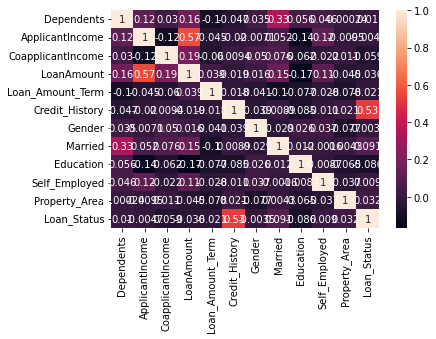

In [12]:
sns.heatmap(train_copy.corr(),annot=True)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = train_copy.drop(['Loan_ID'],axis=1)
X = X.drop('Loan_Status',axis=1)
y = train_copy.Loan_Status

In [15]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         614 non-null    int64  
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    int64  
 5   Loan_Amount_Term   614 non-null    float64
 6   Credit_History     614 non-null    float64
 7   Gender             614 non-null    int64  
 8   Married            614 non-null    int64  
 9   Education          614 non-null    int64  
 10  Self_Employed      614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 62.5+ KB


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=3)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train,y_train)
model2 = LogisticRegression()
model2.fit(X_train,y_train)
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


DecisionTreeClassifier()

In [18]:
print('KNN',accuracy_score(model1.predict(X_test),y_test))
print('Logistic',accuracy_score(model2.predict(X_test),y_test))
print('Decisiontree',accuracy_score(model3.predict(X_test),y_test))


KNN 0.6486486486486487
Logistic 0.8486486486486486
Decisiontree 0.6648648648648648


In [19]:
loanid = list(test_copy['Loan_ID'])

In [20]:
prediction = model2.predict(X)

In [21]:
labels = ['Y' if pred == 1 else 'N' for pred in prediction]

In [25]:
data = {'Loan_ID':loanid,'Loan_Status':labels}